在两个图表中，展示了AND和OR逻辑运算的线性可分性：

AND逻辑运算：红色点表示输出为0的情况，蓝色点表示输出为1的情况。可以看到，存在一条直线（尽管在图中未画出）可以将红色和蓝色点分开，这说明AND问题是线性可分的，因此可以被单层感知器解决。
OR逻辑运算：同样，红色点表示输出为0的情况，蓝色点表示输出为1的情况。OR问题中的点也可以通过一条直线被分开，这同样表明OR问题是线性可分的，因此可以被单层感知器解决。
对于非（NOT）逻辑运算，由于它通常涉及到单个输入，其线性可分性更为直观。在二维空间中，可以简单地通过一条垂直于输入轴的直线来分隔不同的输出类别。

这些示例说明了单层感知器在处理简单线性可分问题时的有效性。

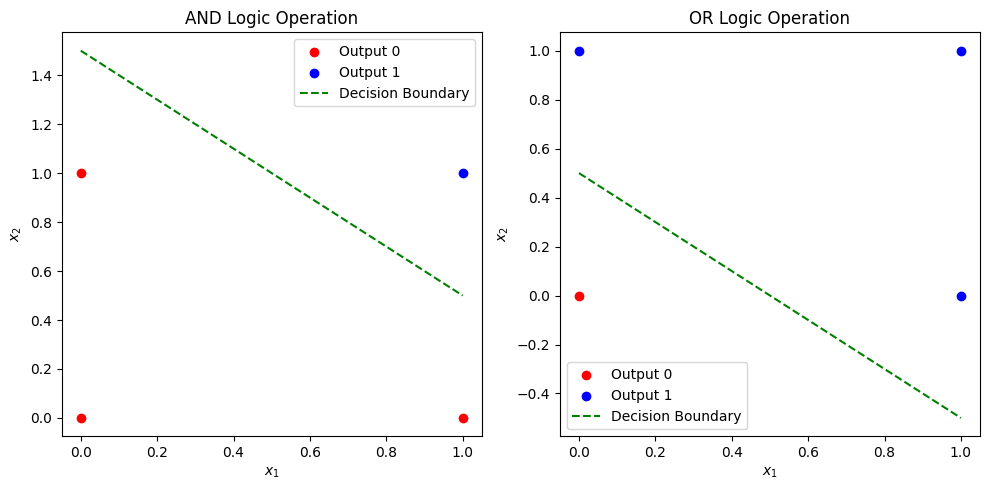

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Re-plotting AND and OR logic operations with decision boundaries

# Decision boundary for AND logic (example line)
w_AND = np.array([-1.5, 1, 1]) # A simple example weight and bias that could represent AND logic
boundary_x_AND = np.array([0, 1])
boundary_y_AND = -(w_AND[1]/w_AND[2])*boundary_x_AND - (w_AND[0]/w_AND[2])

# Decision boundary for OR logic (example line)
w_OR = np.array([-0.5, 1, 1]) # A simple example weight and bias that could represent OR logic
boundary_x_OR = np.array([0, 1])
boundary_y_OR = -(w_OR[1]/w_OR[2])*boundary_x_OR - (w_OR[0]/w_OR[2])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# AND logic operation with decision boundary
axes[0].scatter(X_AND[y_AND == 0][:, 0], X_AND[y_AND == 0][:, 1], color='red', label='Output 0')
axes[0].scatter(X_AND[y_AND == 1][:, 0], X_AND[y_AND == 1][:, 1], color='blue', label='Output 1')
axes[0].plot(boundary_x_AND, boundary_y_AND, 'g--', label='Decision Boundary')
axes[0].set_title('AND Logic Operation')
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].legend()

# OR logic operation with decision boundary
axes[1].scatter(X_OR[y_OR == 0][:, 0], X_OR[y_OR == 0][:, 1], color='red', label='Output 0')
axes[1].scatter(X_OR[y_OR == 1][:, 0], X_OR[y_OR == 1][:, 1], color='blue', label='Output 1')
axes[1].plot(boundary_x_OR, boundary_y_OR, 'g--', label='Decision Boundary')
axes[1].set_title('OR Logic Operation')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].legend()

plt.tight_layout()
plt.show()



单层感知器无法解决异或问题的根本原因在于异或问题本质上是非线性可分的，而单层感知器只能处理线性可分的数据集。异或（XOR）问题可以通过一个简单的例子来说明：

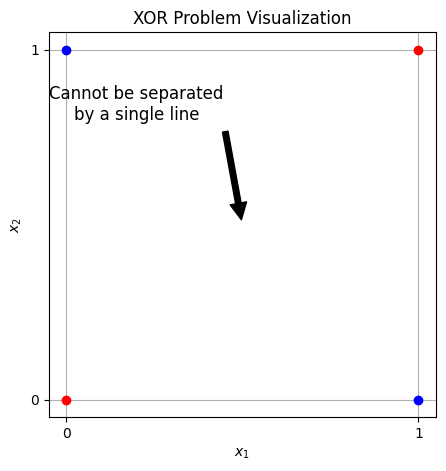

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# XOR problem data points and their labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Plotting the XOR data points
plt.figure(figsize=(5, 5))
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i][0], X[i][1], 'ro')
    else:
        plt.plot(X[i][0], X[i][1], 'bo')

plt.title('XOR Problem Visualization')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xticks([0, 1])
plt.yticks([0, 1])

# Demonstrating the non-linear separability
plt.annotate('Cannot be separated\nby a single line', xy=(0.5, 0.5), xytext=(0.2, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, ha='center')

plt.grid(True)
plt.show()


要解决异或（XOR）问题，我们可以使用一个包含至少一个隐藏层的多层感知器（MLP）。这是因为单层感知器只能解决线性可分问题，而异或问题是非线性的。下面通过代码示例展示如何使用Python和PyTorch框架来实现这样一个MLP。

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR 输入和输出
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# 定义一个简单的MLP模型
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.layer1 = nn.Linear(2, 2) # 输入层到隐藏层
        self.activation = nn.Sigmoid() # 激活函数
        self.layer2 = nn.Linear(2, 1) # 隐藏层到输出层

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.layer2(x)
        return x

# 实例化模型、损失函数和优化器
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 训练模型
for epoch in range(10000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    print("Testing model with XOR inputs:")
    for x_val in X:
        predicted = model(x_val)
        print(f'Input: {x_val}, Predicted: {predicted.item():.4f}')


Epoch [1/10000], Loss: 1.4814
Epoch [1001/10000], Loss: 0.2500
Epoch [2001/10000], Loss: 0.2498
Epoch [3001/10000], Loss: 0.2488
Epoch [4001/10000], Loss: 0.2324
Epoch [5001/10000], Loss: 0.1198
Epoch [6001/10000], Loss: 0.0014
Epoch [7001/10000], Loss: 0.0000
Epoch [8001/10000], Loss: 0.0000
Epoch [9001/10000], Loss: 0.0000
Testing model with XOR inputs:
Input: tensor([0., 0.]), Predicted: 0.0000
Input: tensor([0., 1.]), Predicted: 1.0000
Input: tensor([1., 0.]), Predicted: 1.0000
Input: tensor([1., 1.]), Predicted: 0.0000
